In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', 82)

##  import data

In [159]:
raw_data = pd.read_csv('train.csv')
raw_data.head() #['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [160]:
# data_test = pd.read_csv('test.csv')
# data_test.head()
# raw_data.dtypes

## Handling Missing values

In [161]:
data = raw_data.copy()
# features_mv = [col for col in data.columns if data[col].isnull().sum() > 1 and data[col].dtypes != "O"]

# len(features_mv)
# features_mv 

# created a dataframe of all features with missing value %ages & dtypes
features_mv = pd.DataFrame()
features_mv['Features'] = data.columns.values
features_mv['missing_values'] = list(data.isnull().sum()) 
features_mv['missing_values_%'] = features_mv['missing_values'] * 100 / len(data)
features_mv['dtypes'] = list(data.dtypes)
features_mv = features_mv[features_mv['missing_values_%'] > 0]
features_mv.sort_values('missing_values_%')
 

,Features,missing_values,missing_values_%,dtypes
42,Electrical,1,0.068493,object
25,MasVnrType,8,0.547945,object
26,MasVnrArea,8,0.547945,float64
30,BsmtQual,37,2.534247,object
31,BsmtCond,37,2.534247,object
33,BsmtFinType1,37,2.534247,object
32,BsmtExposure,38,2.602740,object
35,BsmtFinType2,38,2.602740,object
64,GarageCond,81,5.547945,object
63,GarageQual,81,5.547945,object


In [162]:
data_no_mv = raw_data.copy()

# features to remove - if missing values greater than than 47%
features_to_remove = [f[0] for f in features_mv.values if f[2] > 47]

data_no_mv = data_no_mv.drop(features_to_remove, axis=1)
# data_no_mv = data_no_mv[data_no_mv['SalePrice'] < data_no_mv['SalePrice'].quantile(.99)]
print(data_no_mv.shape[0],data_no_mv.shape[1], 'after removing features')

# observations to remove  - if missing values less than than 5%

for feature_row in features_mv[features_mv['missing_values_%'] < 6].values:
    feature = feature_row[0]
    data_no_mv[feature].fillna('_____', inplace=True)
    data_no_mv = data_no_mv[data_no_mv[feature] != '_____']

print(data_no_mv.shape[0], data_no_mv.shape[1], 'after removing observations')

# fill missing value with median for ['LotFrontage'] because it has 17% missing values
data_no_mv['LotFrontage'].fillna(data_no_mv['LotFrontage'].median(), inplace=True)

# data_no_mv.isnull().sum()
# 1460 76 after removing features
# 1338 76 after removing observations

1460 76 after removing features
1338 76 after removing observations


C:\Users\.Net\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [163]:
# handle categorical missing features


## clean data


In [164]:
# for feature in data_no_mv.columns:
#     if(data_no_mv[feature].dtype =='O'):
#         print(feature, data_no_mv[feature].dtype, len(data_no_mv[feature].unique()))

In [165]:
df = data_no_mv.copy()
df = df[['SalePrice','MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]

df = pd.get_dummies(df, drop_first=True)
y = df['SalePrice']
x = df.iloc[:,1:]

model = sm.OLS(y,x)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              456.5
Date:                Thu, 13 Feb 2020   Prob (F-statistic):                        0.00
Time:                        14:40:32   Log-Likelihood:                         -15221.
No. Observations:                1338   AIC:                                  3.089e+04
Df Residuals:                    1115   BIC:                                  3.205e+04
Df Model:                         223                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass              -48.6981     91.708     -0.531      0.596    -228.638     131.242
LotFrontage              64.9068     46.388      1.399      0.162     -26.110     155.924
LotArea                   0.7874      0.115      6.855      0.000       0.562       1.013
OverallQual            6668.8750   1103.650      6.043      0.000    4503.410    8834.340
OverallCond            6228.2299    947.395      6.574      0.000    4369.352    8087.108
YearBuilt               314.9011     88.823      3.545      0.000     140.622     489.180
YearRemodAdd             62.2236     62.098      1.002      0.317     -59.618     184.065
MasVnrArea               19.4732      5.930      3.284      0.001       7.839      31.108
BsmtFinSF1               17.1433      3.008      5.699      0.000      11.242      23.045
BsmtFinSF2                6.7066      6.167      1.088      0.277      -5.393      18.807
BsmtUnfSF                -1.9157      2.930     -0.654      0.513      -7.665       3.833
TotalBsmtSF              21.9338      4.461      4.917      0.000      13.181      30.686
1stFlrSF                 15.4719      7.675      2.016      0.044       0.412      30.532
2ndFlrSF                 36.5182      6.322      5.776      0.000      24.114      48.923
LowQualFinSF            -18.6363     16.971     -1.098      0.272     -51.935      14.662
GrLivArea                33.3538      6.573      5.074      0.000      20.457      46.251
BsmtFullBath            917.7324   2101.578      0.437      0.662   -3205.762    5041.227
BsmtHalfBath            645.2066   3155.608      0.204      0.838   -5546.393    6836.806
FullBath               3196.9362   2428.783      1.316      0.188   -1568.563    7962.436
HalfBath                464.8757   2253.788      0.206      0.837   -3957.268    4887.020
BedroomAbvGr          -3693.5891   1505.330     -2.454      0.014   -6647.188    -739.990
KitchenAbvGr          -1.641e+04   7473.218     -2.196      0.028   -3.11e+04   -1746.623
TotRmsAbvGrd           1177.9861   1007.659      1.169      0.243    -799.134    3155.107
Fireplaces             1946.1466   1410.452      1.380      0.168    -821.292    4713.585
GarageYrBlt             -14.1972     66.123     -0.215      0.830    -143.937     115.543
GarageCars             3914.8454   2380.718      1.644      0.100    -756.346    8586.037
GarageArea               17.3130      8.156      2.123      0.034       1.310      33.316
WoodDeckSF               13.2362      6.080      2.177      0.030       1.307      25.165
OpenPorchSF               1.4362     12.517      0.115      0.909     -23.123      25.996
EnclosedPorch            -0.2241     13.359     -0.017      0.987     -26.435      25.987
3SsnPorch     

In [180]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

x_s = scaler.transform(x)

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.3)
regr = LinearRegression()
regr.fit(X_train, y_train)
y_hat = regr.predict(X_test) #0.4752492885587172

plt.scatter(y_test,y_hat)
plt.show
regr.score(X_test, y_test) #0.8203580307572613

C:\Users\.Net\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

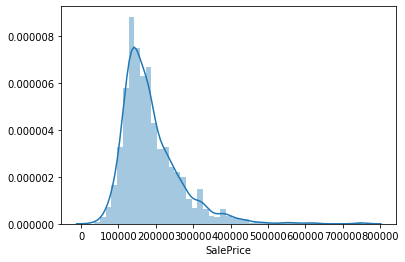

In [178]:

sns.distplot(data_no_mv['SalePrice'])

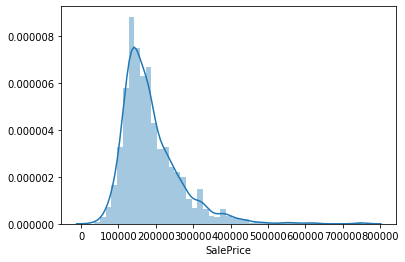

In [168]:
sns.distplot(data_no_mv['SalePrice'])
# plt.scatter(data_no_mv['SalePrice'],)
# plt.show

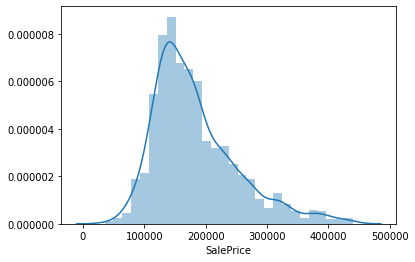

In [174]:
sns.distplot(data_new['SalePrice'])

In [173]:
data_new = data_no_mv[data_no_mv['SalePrice'] < data_no_mv['SalePrice'].quantile(.99)]
data_new

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [176]:
sns.distplot(x['Sale   '])

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1447, 1448, 1451, 1452, 1454, 1455, 1456, 1457, 1458, 1459],
           dtype='int64', length=1324)